Miguel Mattis
HW 5.1 Applied
7/18/20


A simple data analysis exercise while coding in R.

7. The Wage data set contains a number of other features not explored in this chapter, such as marital status (maritl), job class (jobclass), and others. Explore the relationships between some of these other predictors and wage, and use non-linear ﬁtting techniques in order to ﬁt ﬂexible models to the data. Create plots of the results obtained, and write a summary of your ﬁndings.


In [88]:
library(backports)
library(base)
library(boot)
library(tidyverse)
library(ISLR)


In [89]:
summary(maritl)

1. Never Married       2. Married       3. Widowed      4. Divorced 
             648             2074               19              204 
    5. Separated 
              55

In [90]:
summary(jobclass)

1. Industrial 2. Information 
          1544           1456

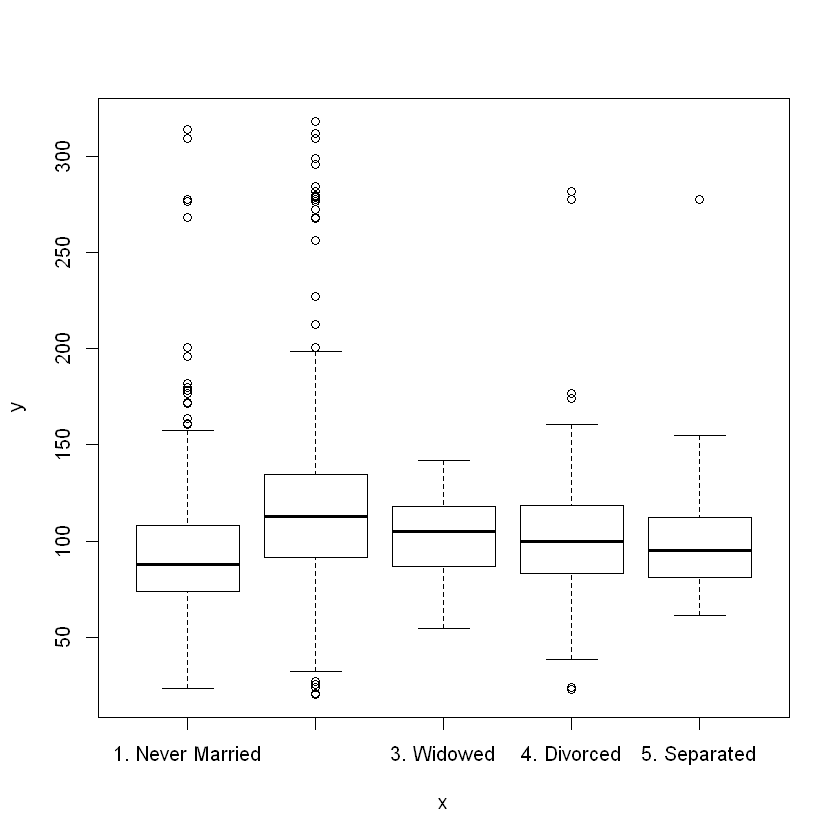

In [91]:
plot(maritl, wage)

Above we see that the second box plot which represents MARRIED wages is the highest. Below we shall observe that INFORMATION is higher than INDUSTRIAL.

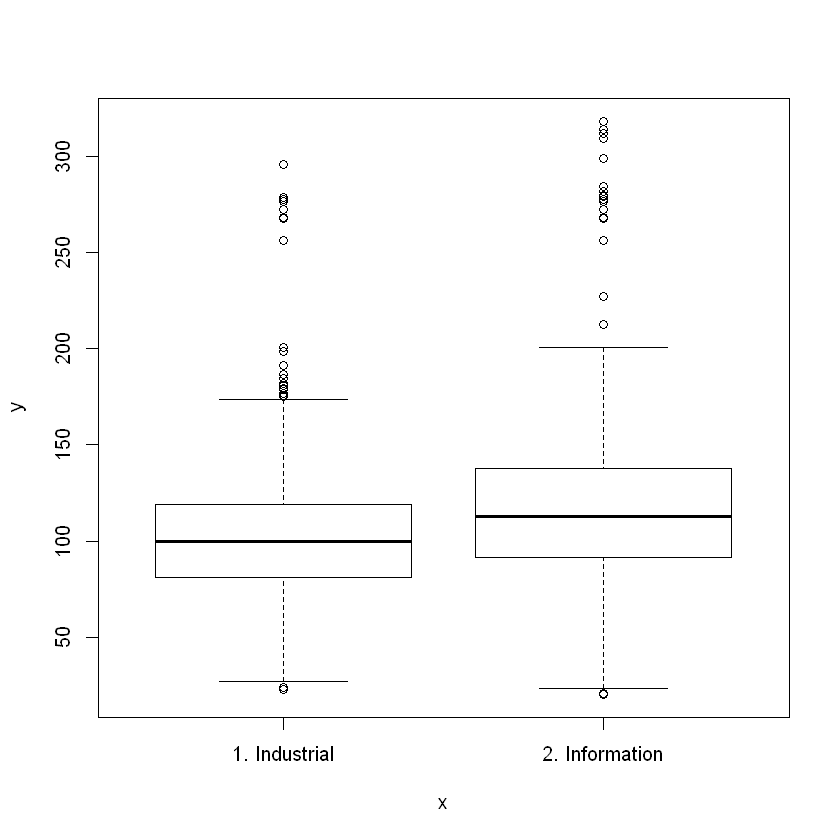

In [92]:
plot(jobclass, wage)

9. This question uses the variables dis (the weighted mean of distances to ﬁve Boston employment centers) and nox (nitrogen oxides concentration in parts per 10 million) from the Boston data. We will treat dis as the predictor and nox as the response.
(a) Use the poly() function to ﬁt a cubic polynomial regression to predict nox using dis. Report the regression output, and plot the resulting data and polynomial ﬁts.
(b) Plot the polynomial ﬁts for a range of diﬀerent polynomial degrees (say, from 1 to 10), and report the associated residual sum of squares. 
(c) Perform cross-validation or another approach to select the optimal degree for the polynomial, and explain your results. 
(d) Use the bs() function to ﬁt a regression spline to predict nox using dis. Report the output for the ﬁt using four degrees of freedom. How did you choose the knots? Plot the resulting ﬁt. 
(e) Now ﬁt a regression spline for a range of degrees of freedom, and plot the resulting ﬁts and report the resulting RSS. Describe the results obtained. 
(f) Perform cross-validation or another approach in order to select the best degrees of freedom for a regression spline on this data. Describe your results.

A)

In [93]:
library(tidyverse)

In [94]:
lm.fit = lm(nox ~ poly(dis, 3), data = Boston)
summary(lm.fit)



Call:
lm(formula = nox ~ poly(dis, 3), data = Boston)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.121130 -0.040619 -0.009738  0.023385  0.194904 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.554695   0.002759 201.021  < 2e-16 ***
poly(dis, 3)1 -2.003096   0.062071 -32.271  < 2e-16 ***
poly(dis, 3)2  0.856330   0.062071  13.796  < 2e-16 ***
poly(dis, 3)3 -0.318049   0.062071  -5.124 4.27e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.06207 on 502 degrees of freedom
Multiple R-squared:  0.7148,	Adjusted R-squared:  0.7131 
F-statistic: 419.3 on 3 and 502 DF,  p-value: < 2.2e-16


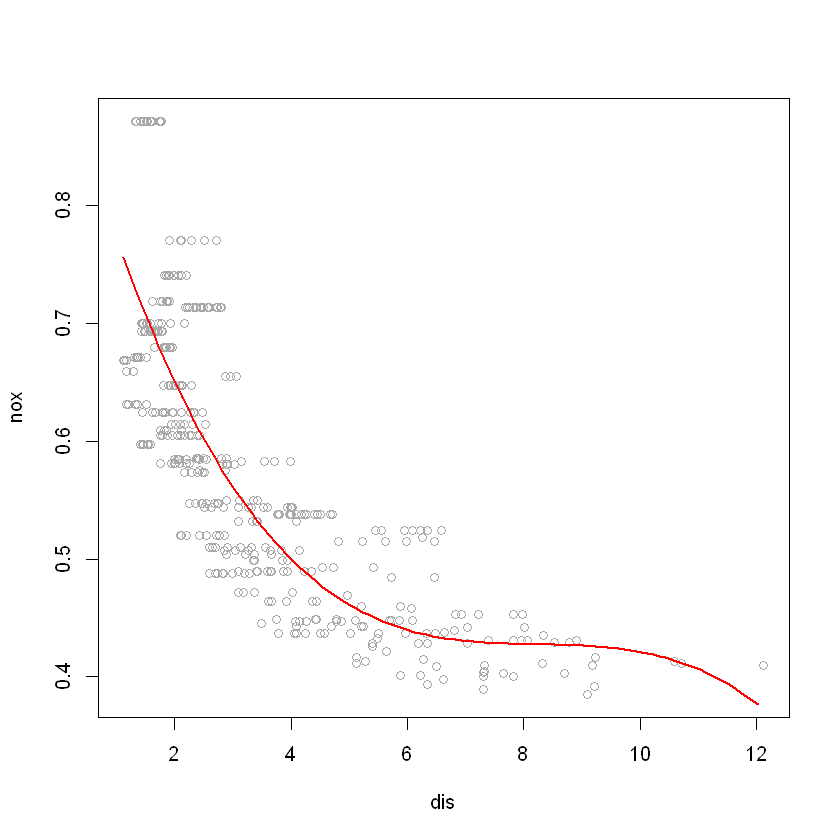

In [95]:
dislim = range(dis)
dis.grid = seq(from = dislim[1], to = dislim[2], by = 0.1)
lm.pred = predict(lm.fit, list(dis = dis.grid))
plot(nox ~ dis, data = Boston, col = "darkgrey")
lines(dis.grid, lm.pred, col = "red", lwd = 2)


B)

In [96]:
all.rss = rep(0, 10)
for (i in 1:10) {
    lm.fit = lm(nox ~ poly(dis, i), data = Boston)
    all.rss[i] = sum(lm.fit$residuals^2) 
}
all.rss

[1] 2.768563 2.035262 1.934107 1.932981 1.915290 1.878257 1.849484 1.835630
 [9] 1.833331 1.832171

RSS decreases with the degree of the polynomial up to 10.


C)

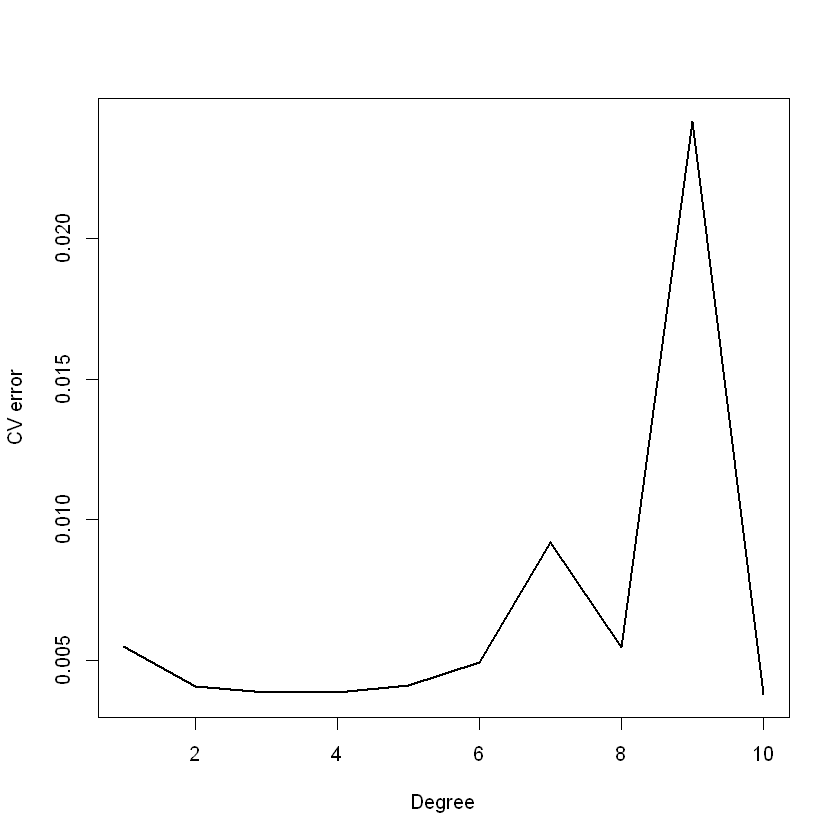

In [97]:
library(boot)
all.deltas = rep(0, 10) 
for (i in 1:10) {
    glm.fit = glm(nox ~ poly(dis, i), data = Boston) 
    all.deltas[i] = cv.glm(Boston, glm.fit, K = 10)$delta[2] 
} 
plot(1:10, all.deltas, xlab = "Degree", ylab = "CV error", type = "l", pch = 20, lwd = 2)

Cross Validation error seems to be lowest at the 3rd degree. I am actually running the same code to generate this graph as Alireza, however, the 8th degree gives us different values. Not sure why this is.

D)

In [98]:
library(splines)
sp.fit = lm(nox ~ bs(dis, df = 3, knots = c(4, 7, 11)), data = Boston)
summary(sp.fit)


Call:
lm(formula = nox ~ bs(dis, df = 3, knots = c(4, 7, 11)), data = Boston)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.124567 -0.040355 -0.008702  0.024740  0.192920 

Coefficients:
                                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)                            0.73926    0.01331  55.537  < 2e-16 ***
bs(dis, df = 3, knots = c(4, 7, 11))1 -0.08861    0.02504  -3.539  0.00044 ***
bs(dis, df = 3, knots = c(4, 7, 11))2 -0.31341    0.01680 -18.658  < 2e-16 ***
bs(dis, df = 3, knots = c(4, 7, 11))3 -0.26618    0.03147  -8.459 3.00e-16 ***
bs(dis, df = 3, knots = c(4, 7, 11))4 -0.39802    0.04647  -8.565  < 2e-16 ***
bs(dis, df = 3, knots = c(4, 7, 11))5 -0.25681    0.09001  -2.853  0.00451 ** 
bs(dis, df = 3, knots = c(4, 7, 11))6 -0.32926    0.06327  -5.204 2.85e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.06185 on 499 degrees of freedom
Multiple R-squared:  0.7185,	Adju

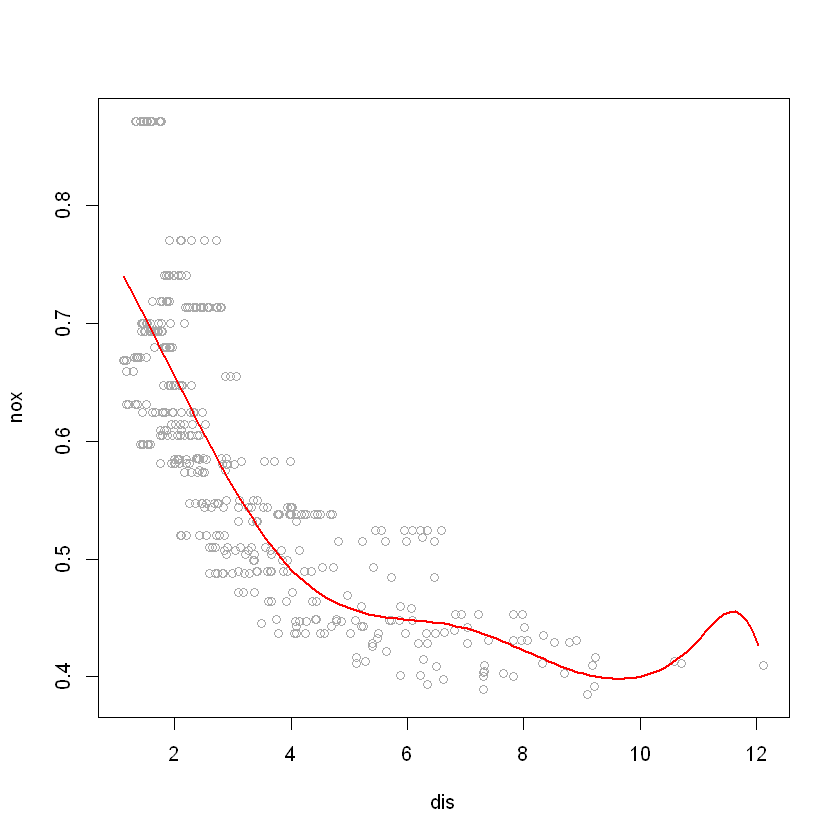

In [99]:
sp.pred = predict(sp.fit, list(dis = dis.grid)) 
plot(nox ~ dis, data = Boston, col = "darkgrey") 
lines(dis.grid, sp.pred, col = "red", lwd = 2)

E)

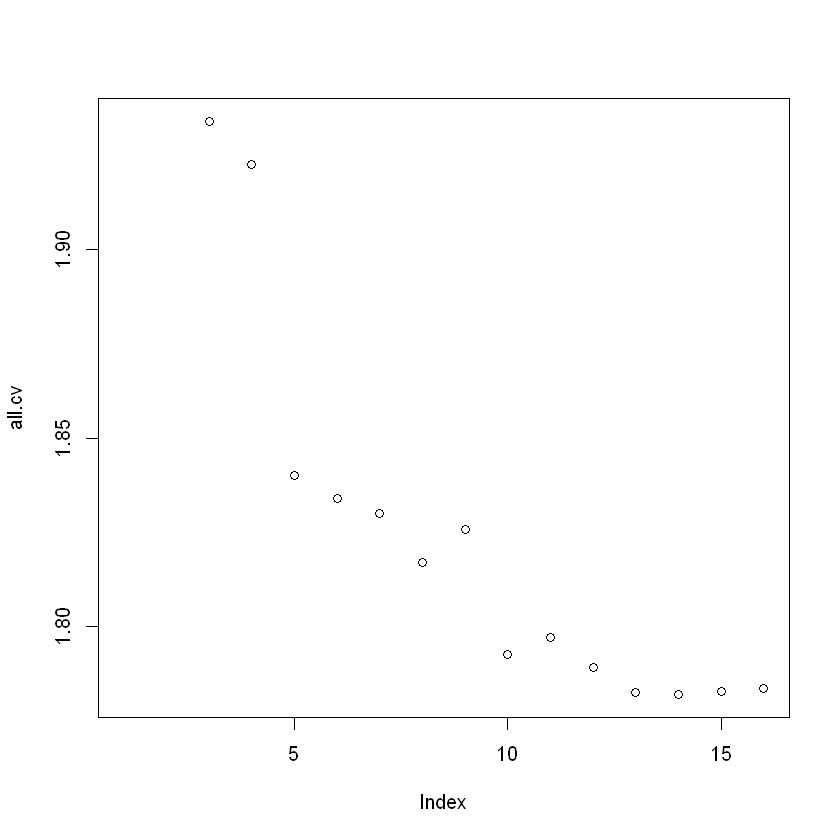

In [100]:
all.cv = rep(NA, 16) 
for (i in 3:16) { 
    lm.fit = lm(nox ~ bs(dis, df = i), data = Boston) 
    all.cv[i] = sum(lm.fit$residuals^2) 
} 
plot(all.cv)

RSS is decreasing as the index is increasing as expected.

F)

Warning message in bs(dis, degree = 3L, knots = numeric(0), Boundary.knots = c(1.1296, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message in bs(dis, degree = 3L, knots = numeric(0), Boundary.knots = c(1.1296, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message in bs(dis, degree = 3L, knots = numeric(0), Boundary.knots = c(1.137, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message in bs(dis, degree = 3L, knots = numeric(0), Boundary.knots = c(1.137, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message in bs(dis, degree = 3L, knots = c(`50%` = 3.1992), Boundary.knots = c(1.1296, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message in bs(dis, degree = 3L, knots = c(`50%` = 3.1992), Boundary.knots = c(1.1296, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message in bs(dis, d

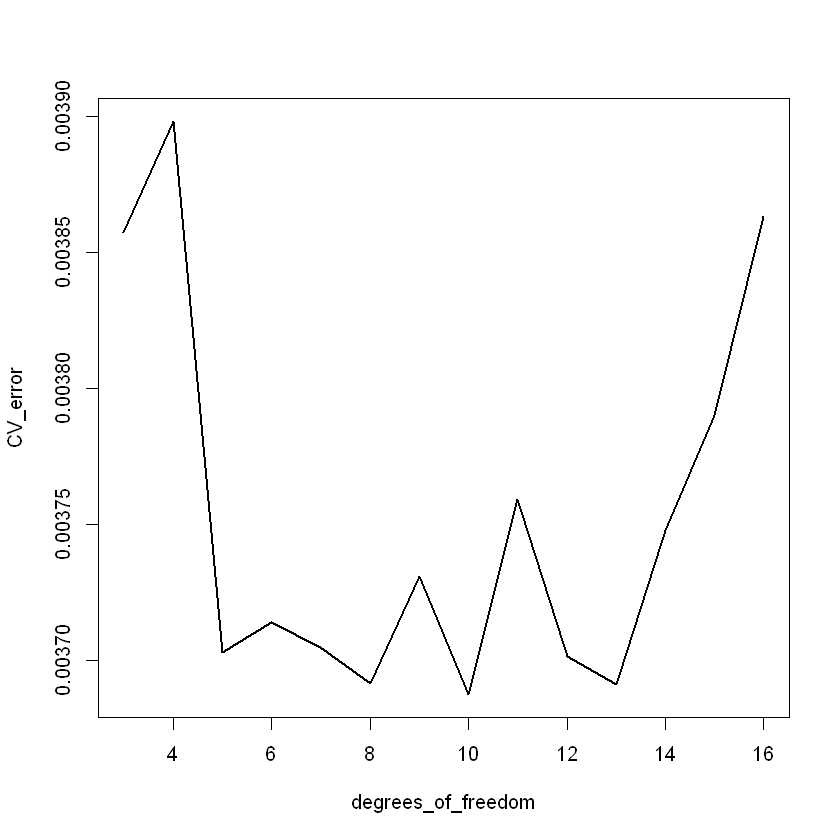

In [101]:
all.cv = rep(0, 16)
for (i in 3:16) {
    lm.fit = glm(nox ~ bs(dis, df = i), data = Boston)
    all.cv[i] = cv.glm(Boston, lm.fit, K = 10)$delta[2]
}
plot(3:16, all.cv[-c(1, 2)], lwd = 2, type = "l", xlab = "degrees_of_freedom", ylab = "CV_error")

After running this code a few times and getting varied results, the only consistency I have seen is that the lowest point usually occurs around df = 10.

 In Section 7.7, it was mentioned that GAMs are generally ﬁt using a backﬁtting approach. The idea behind backﬁtting is actually quite simple. We will now explore backﬁtting in the context of multiple linear regression. Suppose that we would like to perform multiple linear regression, but we do not have software to do so. Instead, we only have software to perform simple linear regression. Therefore, we take the following iterative approach: we repeatedly hold all but one coeﬃcient estimate ﬁxed at its current value, and update only that coeﬃcient estimate using a simple linear regression. The process is continued until convergence—that is, until the coeﬃcient estimates stop changing. We now try this out on a toy example.
 (a) Generate a response Y and two predictors X1 and X2, with n = 100. (b) Initialize ˆ β1 to take on a value of your choice. It does not matter what value you choose. (c) Keeping ˆ β1 ﬁxed, ﬁt the model Y − ˆ β1X1 = β0 + β2X2 + . You can do this as follows:
> a=y-beta1*x1 > beta2=lm(a∼x2)$coef[2] (d) Keeping ˆ β2 ﬁxed, ﬁt the model Y − ˆ β2X2 = β0 + β1X1 + . You can do this as follows:
> a=y-beta2*x2 > beta1=lm(a∼x1)$coef[2] (e) Write a for loop to repeat (c) and (d) 1,000 times. Report the estimates of ˆ β0, ˆ β1, andˆ β2 at each iteration of the for loop. Create a plot in which each of these values is displayed, with ˆ β0, ˆ β1, andˆ β2 each shown in a diﬀerent color. (f) Compare your answer in (e) to the results of simply performing multiple linear regression to predict Y using X1 and X2. Use the abline() function to overlay those multiple linear regression coeﬃcient estimates on the plot obtained in (e). (g) On this data set, how many backﬁtting iterations were required in order to obtain a “good” approximation to the multiple regression coeﬃcient estimates?
 

A)

In [102]:
set.seed(1)
X1 = rnorm(100) 
X2 = rnorm(100) 
eps = rnorm(100, sd = 0.1)
# real data: 
Y = 1 + X1 + -X2 + eps


B)

In [103]:
beta0 = rep(NA, 1000) 
beta1 = rep(NA, 1000) 
beta2 = rep(NA, 1000) 
beta1[1] = 2


C),D), and E)

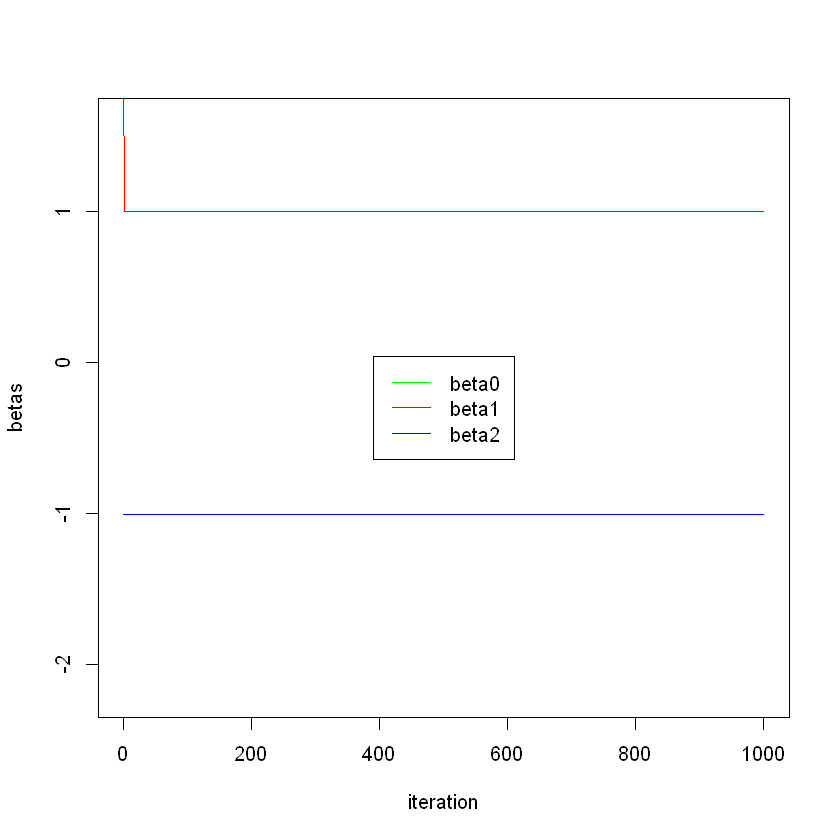

In [104]:
for (i in 1:1000) {
    a = Y - beta1[i] * X1
    beta2[i] = lm(a ~ X2)$coef[2]
    a = Y - beta2[i] * X2
    lm.fit = lm(a ~ X1)
    if (i < 1000) {
        beta1[i + 1] = lm.fit$coef[2]
    }
    beta0[i] = lm.fit$coef[1] 
} 
plot(1:1000, beta0, type = "l", xlab = "iteration", ylab = "betas", ylim = c(-2.2,
                                                                             1.6), col = "green") 
lines(1:1000, beta1, col = "red") 
lines(1:1000, beta2, col = "blue") 
legend("center", c("beta0", "beta1", "beta2"), lty = 1, col = c("green", "red", "blue"))

Above we see that additional iterations after the first did nothing. Since we know most situations show little difference between the GAMs obtained using smooth splines vs natural splines, the following problems should show similar results.

F)

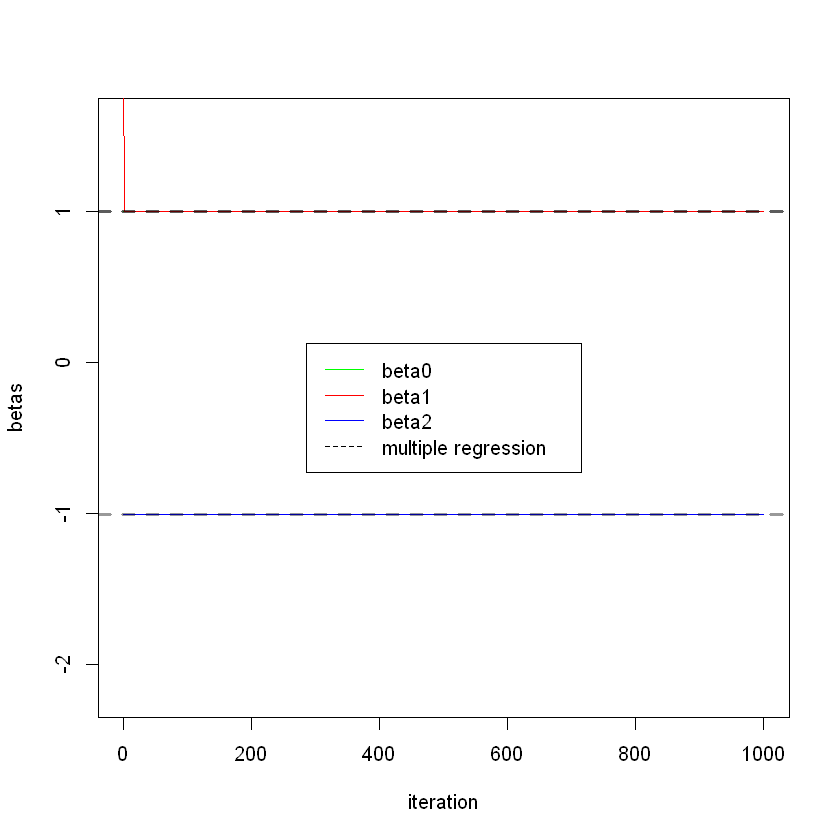

In [105]:
lm.fit = lm(Y ~ X1 + X2)
plot(1:1000, beta0, type = "l", xlab = "iteration", ylab = "betas", ylim = c(-2.2, 1.6), col = "green") 
lines(1:1000, beta1, col = "red") 
lines(1:1000, beta2, col = "blue") 
abline(h = lm.fit$coef[1], lty = "dashed", lwd = 3, col = rgb(0, 0, 0, alpha = 0.4)) 
abline(h = lm.fit$coef[2], lty = "dashed", lwd = 3, col = rgb(0, 0, 0, alpha = 0.4))
abline(h = lm.fit$coef[3], lty = "dashed", lwd = 3, col = rgb(0, 0, 0, alpha = 0.4))
legend("center", c("beta0", "beta1", "beta2", "multiple regression"), lty = c(1, 1, 1, 2), col = c("green", "red", "blue", "black"))


As expected, one backfitting was sufficient.